In [1]:
#import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

In [212]:
#Import users data
dt_users = pd.read_csv("users.csv")
dt_users = dt_users.iloc[:, :-8]

#One hot gender into binary features and convert user_id so it starts from 0
dt_users = pd.get_dummies(dt_users, columns=['gender'], drop_first=True)
dt_users['user_id'] = dt_users['user_id'].apply(lambda x: x-1)
dt_users

,user_id,age,latitude,longitude,interest_sports,interest_arts,interest_travel,interest_edu,gender_P
0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
1,1,37,-6.377776,106.919808,0.5,0.8,0.4,0.4,0
2,2,30,-7.839328,111.394950,0.3,0.2,0.0,0.0,0
3,3,46,-7.777849,107.037494,0.5,0.4,1.0,1.0,0
4,4,15,-6.533740,106.865799,0.1,0.4,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...
95,95,50,-6.485163,107.362126,0.5,0.8,0.0,0.0,0
96,96,39,-6.617905,109.939346,0.5,1.0,0.6,1.0,0
97,97,54,-7.016094,110.718168,0.3,0.8,0.8,0.6,0
98,98,33,-6.725911,111.560163,0.5,0.0,0.2,0.2,1


In [40]:
#import activities data
dt_activities = pd.read_csv("activities.csv")

#Convert date from string type into date type, then extract weekend binary feature from date variable
dt_activities["date"] = dt_activities["date"].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').date())
dt_activities["weekend"] = dt_activities["date"].apply(lambda x: 1 if x.weekday() in [5,6] else 0)

#Convert act_id so that it starts from 0 and one-hot the community variable into binary features
dt_activities['act_id'] = dt_activities['act_id'].apply(lambda x: x-1)
dt_activities = pd.get_dummies(dt_activities, columns=['community'], drop_first=True)

#Drop unnecessary features
dt_activities = dt_activities.drop(columns = ['date', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])
dt_activities

,act_id,latitude,longitude,duration,daytime_binary,sports,arts,travel,edu,weekend,community_Influencer,community_JTP Group,community_Komunitas Dokter,community_LebaRun,community_Pelajar Pasundan,community_Pemuda Jakarta,community_RPTRA Taman Apel,community_Wahooo
0,0,-6.903441,107.615966,120,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1,-6.220739,106.804537,180,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,2,-6.920260,107.634990,300,1,0,0,1,0,1,0,0,0,0,0,0,0,0
3,3,-6.859976,107.462859,300,1,1,0,1,0,1,0,0,0,0,0,0,0,1
4,4,-6.900136,107.618731,180,1,1,0,0,0,1,0,0,0,1,0,0,0,0
5,5,-6.169303,106.899211,120,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,6,-7.887840,112.529555,300,1,0,0,1,0,1,0,1,0,0,0,0,0,0
7,7,-6.174718,106.790097,300,0,0,0,1,0,1,0,0,0,0,0,1,0,0
8,8,-6.170485,106.784437,240,1,0,0,0,1,0,0,0,0,0,0,0,1,0
9,9,-6.895688,107.610656,120,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [201]:
#Import interaction matrix data and drop unnecessary collumns
dt_interact = pd.read_csv("mat_interaksi.csv")
dt_interact = dt_interact.iloc[:,1:]

#Replace all 0.5-valued cells to 1.0
dt_interact

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,1,1,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,1,1,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,1
96,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
97,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
#Transform the matrix structure into tabularized structure (stacking) and convert the act_id so that it starts from 0
dt_interact = dt_interact.stack(dropna=True).reset_index().rename(columns={"level_0":"user_id", "level_1":"act_id", 0:"y"})
dt_interact['act_id'] = dt_interact['act_id'].apply(lambda x: int(x)-1)

# dt_interact = pd.get_dummies(dt_interact, columns=['y'])
# dt_interact.rename(columns = {'y_0.0':'no', 'y_1.0':'yes'}, inplace = True)
dt_interact

,user_id,act_id,y
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
...,...,...,...
3195,99,27,0
3196,99,28,0
3197,99,29,0
3198,99,30,0


In [187]:
#Merge (left join) both the activities and user dataframe into the interaction dataframe
dt_interact = dt_interact.merge(dt_activities, how="left", left_on="act_id", right_on="act_id")
dt_interact = dt_interact.merge(dt_users, how="left", left_on="user_id", right_on="user_id")
dt_interact

,user_id,act_id,y,latitude_x,longitude_x,duration,daytime_binary,sports,arts,travel,...,community_RPTRA Taman Apel,community_Wahooo,age,latitude_y,longitude_y,interest_sports,interest_arts,interest_travel,interest_edu,gender_P
0,0,0,0,-6.903441,107.615966,120,1,1,0,0,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
1,0,1,0,-6.220739,106.804537,180,0,0,1,0,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
2,0,2,0,-6.920260,107.634990,300,1,0,0,1,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
3,0,3,0,-6.859976,107.462859,300,1,1,0,1,...,0,1,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
4,0,4,0,-6.900136,107.618731,180,1,1,0,0,...,0,0,39,-6.745343,110.267408,0.5,0.8,0.6,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,99,27,0,-6.208089,106.833231,120,1,1,0,0,...,1,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0
3196,99,28,0,-8.410701,116.458379,1440,0,1,0,1,...,0,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0
3197,99,29,0,-6.989897,110.422348,120,1,0,0,0,...,0,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0
3198,99,30,0,-6.858606,107.636549,120,0,0,1,0,...,0,0,54,-6.672681,105.929614,0.3,0.6,0.2,0.6,0


In [188]:
#Slice the collumns into the array accordingly
y = dt_interact.iloc[:,2:3].values
xact = dt_interact.iloc[:,3:-8].values
xuser = dt_interact.iloc[:,-8:].values

print(f"dt_users shape : {xuser.shape}")
print(f"dt_activities shape : {xact.shape}")
print(f"y shape : {y.shape}")

dt_users shape : (3200, 8)
dt_activities shape : (3200, 17)
y shape : (3200, 1)


In [189]:
#Standardize the x features (Y is not scaled for now)
scalerAct = StandardScaler()
scalerAct.fit(xact)
xact = scalerAct.transform(xact)

scalerUser = StandardScaler()
scalerUser.fit(xuser)
xuser = scalerUser.transform(xuser)

# scalerTarget = StandardScaler()
# scalerTarget.fit(y)
# y = scalerTarget.transform(y)

In [190]:
#Check the proportion of the classes in the sample
print("% of y = 0: ", (y[y == 0].shape[0])/y.shape[0]*100)
# print("% of y = Bucket: ", (y[y[:,1] == 1].shape[0])/y.shape[0]*100)
print("% of y = Joined or Bucketlisted: ", (y[y == 1].shape[0])/y.shape[0]*100)

% of y = 0:  88.59375
% of y = Joined or Bucketlisted:  11.40625


In [191]:
xact_train, xact_test, xuser_train, xuser_test, y_train, y_test = train_test_split(xact, xuser, y,
                                                                                   train_size=0.80,
                                                                                   shuffle=True,
                                                                                   random_state=1,
                                                                                   stratify=y
                                                                                  )

# xuser_train, xuser_test = train_test_split(xuser, train_size=0.80, shuffle=True, random_state=1)
# y_train, y_test = train_test_split(y, train_size=0.80, shuffle=True, random_state=1)

print(f"act training data shape: {xact_train.shape}")
print(f"act test data shape: {xact_test.shape}")
print(f"user training data shape: {xuser_train.shape}")
print(f"user test data shape: {xuser_test.shape}")
print(f"y training data shape: {y_train.shape}")
print(f"y test data shape: {y_test.shape}")

act training data shape: (2560, 17)
act test data shape: (640, 17)
user training data shape: (2560, 8)
user test data shape: (640, 8)
y training data shape: (2560, 1)
y test data shape: (640, 1)


In [192]:
print("% of y_train = 0: ", (y_train[y_train == 0].shape[0])/y_train.shape[0]*100)
# print("% of y_train = Bucket: ", (y_train[y_train[:,1] == 1].shape[0])/y_train.shape[0]*100)
print("% of y_train = Joined or Bucketlisted: ", (y_train[y_train == 1].shape[0])/y_train.shape[0]*100)

print("\n% of y_test = 0: ", (y_test[y_test == 0].shape[0])/y_test.shape[0]*100)
# print("% of y_test = Bucket: ", (y_test[y_test[:,1] == 1].shape[0])/y_test.shape[0]*100)
print("% of y_test = Joined or Bucketlisted: ", (y_test[y_test == 1].shape[0])/y_test.shape[0]*100)

% of y_train = 0:  88.59375
% of y_train = Joined or Bucketlisted:  11.40625

% of y_test = 0:  88.59375
% of y_test = Joined or Bucketlisted:  11.40625


In [247]:
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([   
    
    tf.keras.layers.Dense(num_outputs, activation='relu'),
  
])

act_NN = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(num_outputs, activation='relu'),

])

num_user_features = xuser_train.shape[1] 
num_act_features = xact_train.shape[1]

input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_act = tf.keras.layers.Input(shape=(num_act_features))
va = act_NN(input_act)
va = tf.linalg.l2_normalize(va, axis=1)

# compute the dot product of the two vectors vu and va
dot = tf.keras.layers.Dot(axes=1)([vu, va])
o_NN = tf.keras.models.Sequential([
    
    tf.keras.layers.Dense(8, activation='relu',
#                           kernel_regularizer = tf.keras.regularizers.L2(l2= 0.1),
#                           bias_regularizer = tf.keras.regularizers.L2(l2= 0.001)
                         ),
    tf.keras.layers.Dense(1, activation='sigmoid',
                          kernel_regularizer = tf.keras.regularizers.L2(l2= 1.0),
#                           bias_regularizer = tf.keras.regularizers.L2(l2= 0.001)
                         ),

])
output = o_NN(dot)

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_act], output)

model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 input_34 (InputLayer)          [(None, 17)]         0           []                               
                                                                                                  
 sequential_48 (Sequential)     (None, 32)           288         ['input_33[0][0]']               
                                                                                                  
 sequential_49 (Sequential)     (None, 32)           576         ['input_34[0][0]']               
                                                                                           

In [248]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.BinaryFocalCrossentropy()
opt = keras.optimizers.Adam(learning_rate=0.001)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
auc = tf.keras.metrics.AUC(name="auc")
model.compile(optimizer=opt,
              loss=cost_fn, metrics = auc
             )

In [249]:
tf.random.set_seed(1)
history = model.fit([xuser_train, xact_train],
                    y_train,
                    epochs=1000,
                    batch_size=16,
                    verbose=2,
                    validation_split = 0.2,
                    callbacks = [stop_early]
                   )

Epoch 1/1000
128/128 - 1s - loss: 0.9888 - auc: 0.5514 - val_loss: 0.7264 - val_auc: 0.4863 - 629ms/epoch - 5ms/step
Epoch 2/1000
128/128 - 0s - loss: 0.5608 - auc: 0.6372 - val_loss: 0.4157 - val_auc: 0.5154 - 123ms/epoch - 961us/step
Epoch 3/1000
128/128 - 0s - loss: 0.3305 - auc: 0.6801 - val_loss: 0.2506 - val_auc: 0.5698 - 130ms/epoch - 1ms/step
Epoch 4/1000
128/128 - 0s - loss: 0.2106 - auc: 0.7195 - val_loss: 0.1664 - val_auc: 0.5823 - 119ms/epoch - 928us/step
Epoch 5/1000
128/128 - 0s - loss: 0.1510 - auc: 0.6780 - val_loss: 0.1250 - val_auc: 0.5895 - 122ms/epoch - 954us/step
Epoch 6/1000
128/128 - 0s - loss: 0.1224 - auc: 0.6690 - val_loss: 0.1049 - val_auc: 0.5728 - 115ms/epoch - 901us/step
Epoch 7/1000
128/128 - 0s - loss: 0.1090 - auc: 0.6338 - val_loss: 0.0951 - val_auc: 0.5878 - 115ms/epoch - 901us/step
Epoch 8/1000
128/128 - 0s - loss: 0.1028 - auc: 0.6002 - val_loss: 0.0901 - val_auc: 0.5824 - 121ms/epoch - 943us/step
Epoch 9/1000
128/128 - 0s - loss: 0.0999 - auc: 0.60

Epoch 70/1000
128/128 - 0s - loss: 0.0858 - auc: 0.8787 - val_loss: 0.0817 - val_auc: 0.7508 - 118ms/epoch - 919us/step
Epoch 71/1000
128/128 - 0s - loss: 0.0855 - auc: 0.8762 - val_loss: 0.0812 - val_auc: 0.7527 - 115ms/epoch - 898us/step
Epoch 72/1000
128/128 - 0s - loss: 0.0851 - auc: 0.8801 - val_loss: 0.0813 - val_auc: 0.7551 - 119ms/epoch - 932us/step
Epoch 73/1000
128/128 - 0s - loss: 0.0848 - auc: 0.8808 - val_loss: 0.0818 - val_auc: 0.7564 - 118ms/epoch - 919us/step
Epoch 74/1000
128/128 - 0s - loss: 0.0844 - auc: 0.8829 - val_loss: 0.0817 - val_auc: 0.7585 - 116ms/epoch - 909us/step
Epoch 75/1000
128/128 - 0s - loss: 0.0843 - auc: 0.8833 - val_loss: 0.0809 - val_auc: 0.7544 - 119ms/epoch - 930us/step
Epoch 76/1000
128/128 - 0s - loss: 0.0840 - auc: 0.8823 - val_loss: 0.0810 - val_auc: 0.7572 - 121ms/epoch - 943us/step
Epoch 77/1000
128/128 - 0s - loss: 0.0836 - auc: 0.8861 - val_loss: 0.0805 - val_auc: 0.7630 - 119ms/epoch - 931us/step
Epoch 78/1000
128/128 - 0s - loss: 0.083

Epoch 138/1000
128/128 - 0s - loss: 0.0714 - auc: 0.9176 - val_loss: 0.0789 - val_auc: 0.7798 - 120ms/epoch - 937us/step
Epoch 139/1000
128/128 - 0s - loss: 0.0714 - auc: 0.9176 - val_loss: 0.0779 - val_auc: 0.7835 - 118ms/epoch - 919us/step
Epoch 140/1000
128/128 - 0s - loss: 0.0711 - auc: 0.9197 - val_loss: 0.0775 - val_auc: 0.7804 - 120ms/epoch - 935us/step
Epoch 141/1000
128/128 - 0s - loss: 0.0711 - auc: 0.9184 - val_loss: 0.0775 - val_auc: 0.7863 - 118ms/epoch - 921us/step
Epoch 142/1000
128/128 - 0s - loss: 0.0708 - auc: 0.9198 - val_loss: 0.0773 - val_auc: 0.7836 - 117ms/epoch - 915us/step
Epoch 143/1000
128/128 - 0s - loss: 0.0708 - auc: 0.9186 - val_loss: 0.0771 - val_auc: 0.7849 - 119ms/epoch - 931us/step
Epoch 144/1000
128/128 - 0s - loss: 0.0708 - auc: 0.9184 - val_loss: 0.0778 - val_auc: 0.7812 - 120ms/epoch - 934us/step
Epoch 145/1000
128/128 - 0s - loss: 0.0704 - auc: 0.9210 - val_loss: 0.0782 - val_auc: 0.7841 - 118ms/epoch - 920us/step
Epoch 146/1000
128/128 - 0s - lo

Best Model: Min Training Loss (MAE) = 0.069, Min Validation Loss (MAE) = 0.077


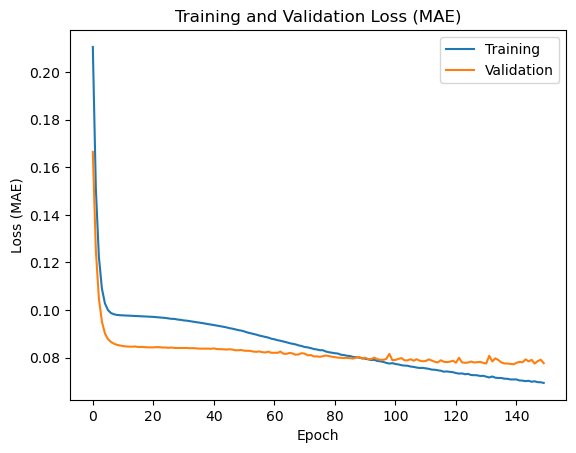

In [250]:
# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss'][3:]
val_loss = history.history['val_loss'][3:]

# Get number of epochs
epochs = range(len(loss))

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss (MAE)')

print('Best Model: Min Training Loss (MAE) = {:.3f}, Min Validation Loss (MAE) = {:.3f}'
      .format(min(loss), min(val_loss)))

Best Model: Max Training AUC = 0.924, Max Validation AUC = 0.790


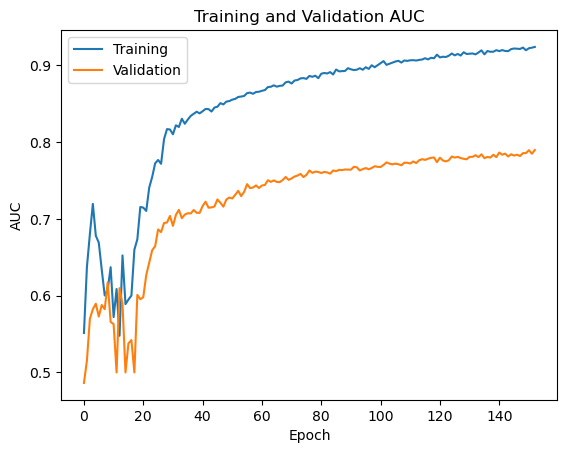

In [251]:
# Retrieve a list of list results on training and validation data
# sets for each training epoch
acc = history.history['auc']
val_acc = history.history['val_auc']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation loss per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('Training and Validation AUC')

print('Best Model: Max Training AUC = {:.3f}, Max Validation AUC = {:.3f}'
      .format(max(acc), max(val_acc)))

In [221]:
y_out = model.predict([xuser_test, xact_test])
y_pred = np.array([1 if i >= 0.5 else 0 for i in y_out])
y_pred

20/20 [==============================] - 0s 836us/step


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [253]:
zmax=0
jopt=0

for j in np.arange(0.25, 0.5, 0.01):
    y_pred = np.array([1 if i >= j else 0 for i in y_out])
    z = f1_score(y_test, y_pred, average='weighted', zero_division = 0)
    if z >= zmax:
        zmax = z
        jopt = j

print(jopt)

cr = classification_report(y_test, np.array([1 if i >= jopt else 0 for i in y_out]), zero_division = 0)
print(cr)

0.4900000000000002
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       567
           1       0.46      0.33      0.38        73

    accuracy                           0.88       640
   macro avg       0.69      0.64      0.66       640
weighted avg       0.86      0.88      0.87       640

